Load the example titanic dataset (sns.load_dataset("titanic")) and visualize a logistic regression model. Show the survival proability as a function of age and sex.

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
Titanic = sns.load_dataset('titanic')
data = Titanic[['age','sex','survived']]

In [35]:
data.head().append(data.tail())

,age,sex,survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0
886,27.0,male,0
887,19.0,female,1
888,NaN,female,0
889,26.0,male,1
890,32.0,male,0


In [36]:
data.describe()

,age,survived
count,714.000000,891.000000
mean,29.699118,0.383838
std,14.526497,0.486592
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

In [60]:
data.isnull().sum()
data_fin = data.dropna()
le = LabelEncoder()
le.fit(data_fin['sex'])
data_fin['sex_le'] = le.transform(data_fin['sex'])

<ipython-input-60-0db097d1f05b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fin['sex_le'] = le.transform(data_fin['sex'])


In [57]:
data_fin['sex_le']

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: sex_le, Length: 714, dtype: int32

In [63]:
x = data_fin[['age','sex_le']]
y = data_fin['survived']
std = StandardScaler()
x = std.fit_transform(x)

In [64]:
lr = LogisticRegression()
lr.fit(x, y)
print("得出来的权重：", lr.coef_)

得出来的权重： [[-0.07862462 -1.17821552]]


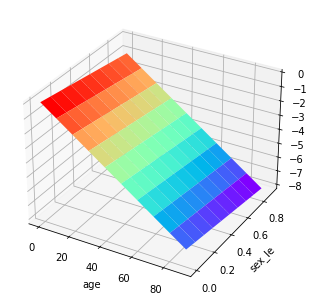

In [78]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(0, 100, 10)
y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(x, y) # 网格的创建，生成二维数组
Z = -0.07862462*X + -1.17821552*Y
plt.xlabel("age")
plt.ylabel("sex_le")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()